In [74]:
# Manipulation libraries
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

In [2]:
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# ML libraries

from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

In [83]:
# Save the model
import pickle

# Importing Data

Importing data from HTML rendered websites

In [8]:
df = pd.read_csv(r'C:\Users\ponde\Documents\FreshJobs\2020-11-20 11h25 dataset_pre_tolken.csv')

In [9]:
df.head()

,candidateMatch,len_aTagContent_qt,len_aTagContent_group_between 60 and 175,len_aTagContent_group_under 60,len_href_qt,num_keys_qt,attr_job_yn,all_text
0,0.0,0.376376,0,1,0.063564,0.063564,0,Skip to Content Main class data ga event data ...
1,0.0,0.446947,0,1,0.077578,0.077578,0,Shopify Careers careers href class data ga ev...
2,0.0,0.376376,0,1,0.138639,0.138639,0,Life at Shopify careers culture href class ite...
3,0.0,0.117618,0,1,0.125125,0.125125,0,Teams careers teams href class itemprop market...
4,0.0,0.334835,0,1,0.174174,0.174174,0,Work anywhere careers work anywhere href class...


In [10]:
df.drop('all_text',axis='columns',inplace=True)

In [11]:
df.head()

,candidateMatch,len_aTagContent_qt,len_aTagContent_group_between 60 and 175,len_aTagContent_group_under 60,len_href_qt,num_keys_qt,attr_job_yn
0,0.0,0.376376,0,1,0.063564,0.063564,0
1,0.0,0.446947,0,1,0.077578,0.077578,0
2,0.0,0.376376,0,1,0.138639,0.138639,0
3,0.0,0.117618,0,1,0.125125,0.125125,0
4,0.0,0.334835,0,1,0.174174,0.174174,0


We are going to split the dataset so we can train the models and build a stack later

In [12]:
df_train, df_test = train_test_split(
    df,
    train_size=0.7,
    stratify=df["candidateMatch"]
)

y = df_train["candidateMatch"]  # variável resposta
X = df_train.drop("candidateMatch", axis=1)

y_test = df_test["candidateMatch"]  # variável resposta
X_test = df_test.drop("candidateMatch", axis=1)

# Modeling

<h3>Base line: Dummy</h3>

In [ ]:
dummy = DummyClassifier(strategy="stratified")

dummy.fit(X, y)

dummy.score(X_test, y_test)

<h3>Logistic regression</h3>

In [16]:
lr = LogisticRegression()

In [17]:
lr_parameters = {
    'max_iter' : [50, 100, 1000],
    "C" : [0.01 , 0.1, 1.0, 5.0, 8.0]
}

In [18]:
lr_grid = GridSearchCV(lr, lr_parameters, cv=10, scoring='accuracy', return_train_score=False)

In [19]:
lr_grid.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1.0, 5.0, 8.0],
                         'max_iter': [50, 100, 1000]},
             scoring='accuracy')

In [20]:
pd.DataFrame(lr_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.869868,0.013150,"{'C': 0.01, 'max_iter': 50}"
1,0.869868,0.013150,"{'C': 0.01, 'max_iter': 100}"
2,0.869868,0.013150,"{'C': 0.01, 'max_iter': 1000}"
3,0.901253,0.008121,"{'C': 0.1, 'max_iter': 50}"
4,0.901253,0.008121,"{'C': 0.1, 'max_iter': 100}"
5,0.901253,0.008121,"{'C': 0.1, 'max_iter': 1000}"
6,0.910028,0.006365,"{'C': 1.0, 'max_iter': 50}"
7,0.910028,0.006365,"{'C': 1.0, 'max_iter': 100}"
8,0.910028,0.006365,"{'C': 1.0, 'max_iter': 1000}"
9,0.911124,0.008968,"{'C': 5.0, 'max_iter': 50}"


In [21]:
lr_best_estimator = lr_grid.best_estimator_
lr_best_score = lr_grid.best_score_
print('best estimator: ', lr_best_estimator)
print('best score: ', lr_best_score)

best estimator:  LogisticRegression(C=8.0, max_iter=50)
best score:  0.9117823404665509


<h3>Random Forest Classifier</h3>

In [22]:
rfc = RandomForestClassifier()

In [23]:
rfc_parameters = {
    'n_estimators': [50,100,150,300],
    'max_depth' : [2,5,8]
}

In [24]:
rfc_grid = GridSearchCV(rfc, rfc_parameters, cv=10, scoring='accuracy', return_train_score=False)

In [25]:
rfc_grid.fit(X,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 8],
                         'n_estimators': [50, 100, 150, 300]},
             scoring='accuracy')

In [26]:
pd.DataFrame(rfc_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.914200,0.010101,"{'max_depth': 2, 'n_estimators': 50}"
1,0.915299,0.009128,"{'max_depth': 2, 'n_estimators': 100}"
2,0.914423,0.011149,"{'max_depth': 2, 'n_estimators': 150}"
3,0.916396,0.008485,"{'max_depth': 2, 'n_estimators': 300}"
4,0.944044,0.009309,"{'max_depth': 5, 'n_estimators': 50}"
5,0.944265,0.008261,"{'max_depth': 5, 'n_estimators': 100}"
6,0.944044,0.007605,"{'max_depth': 5, 'n_estimators': 150}"
7,0.943823,0.007616,"{'max_depth': 5, 'n_estimators': 300}"
8,0.965987,0.004303,"{'max_depth': 8, 'n_estimators': 50}"
9,0.967522,0.005176,"{'max_depth': 8, 'n_estimators': 100}"


In [27]:
rfc_best_estimator = rfc_grid.best_estimator_
rfc_best_score = rfc_grid.best_score_
print('best estimator: ', rfc_best_estimator)
print('best score: ', rfc_best_score)

best estimator:  RandomForestClassifier(max_depth=8, n_estimators=150)
best score:  0.9675226527858106


<h3>SCV</h3>

First, let's take a look at how the job links are distributed when we cross two of the most important features.
It looks promissing. Probably the model will be able to create hyperplans that properly classifies the links once we add other features.

c:\users\ponde\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


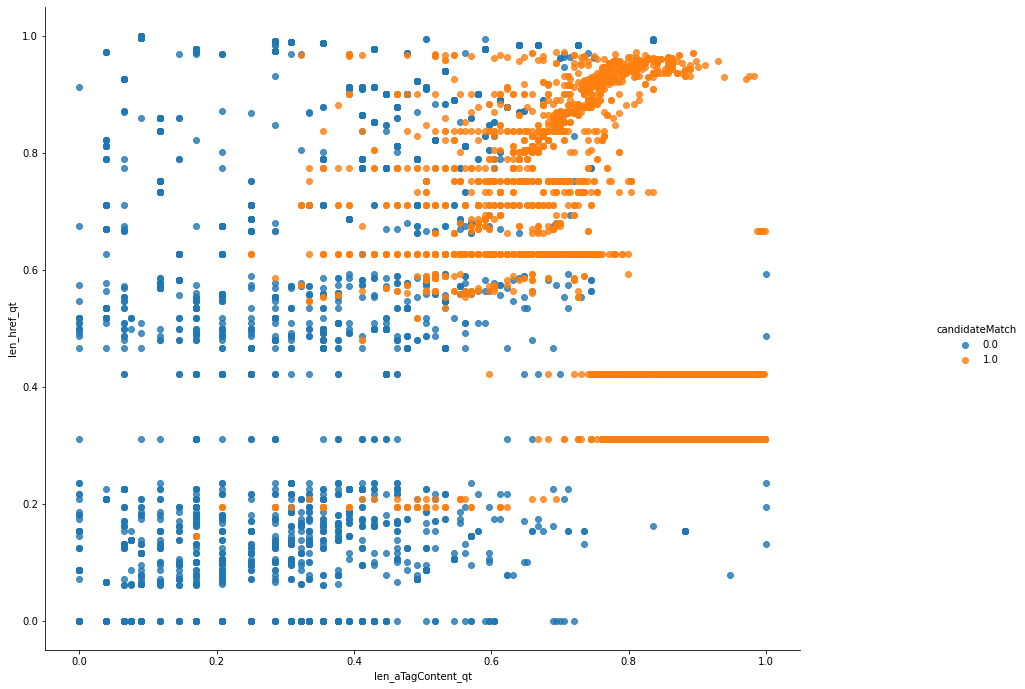

In [28]:
sns.lmplot('len_aTagContent_qt', 'len_href_qt', df, hue='candidateMatch', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

In [33]:
svc = SVC()

In [34]:
svc_parameters = [
    {'C': [0.01, 0.1, 1], 'kernel': ['linear']},
    {'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']}#,
]

In [35]:
svc_grid = GridSearchCV(svc, svc_parameters, cv=10, scoring='accuracy', return_train_score=False)

In [36]:
svc_grid.fit(X,y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [37]:
pd.DataFrame(svc_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.846603,0.019823,"{'C': 0.01, 'kernel': 'linear'}"
1,0.909370,0.007728,"{'C': 0.1, 'kernel': 'linear'}"
2,0.910685,0.009223,"{'C': 1, 'kernel': 'linear'}"
3,0.565723,0.000576,"{'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}"
4,0.565723,0.000576,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}"
5,0.565723,0.000576,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}"
6,0.791749,0.020705,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}"
7,0.858235,0.017024,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}"
8,0.931749,0.009571,"{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}"
9,0.868115,0.018239,"{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}"


In [38]:
svc_best_estimator = svc_grid.best_estimator_
svc_best_score = svc_grid.best_score_
print('best estimator: ', svc_best_estimator)
print('best score: ', svc_best_score)

best estimator:  SVC(C=100, gamma=100)
best score:  0.9668652400231347


We got a really good result again.

<h3>KNN</h3>

In [39]:
knn=KNeighborsClassifier()
knn_parameters = [
                  {'n_neighbors' : [5,11, 31, 81, 99], 'algorithm': ['auto', 'ball_tree','kd_tree', 'brute'],
                   'p':[1,2]} 
]

In [40]:
knn_grid = GridSearchCV(knn, knn_parameters, cv=10, scoring='accuracy', return_train_score=False)

In [41]:
knn_grid.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [5, 11, 31, 81, 99], 'p': [1, 2]}],
             scoring='accuracy')

In [42]:
pd.DataFrame(knn_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.960062,0.005357,"{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}"
1,0.959625,0.004387,"{'algorithm': 'auto', 'n_neighbors': 5, 'p': 2}"
2,0.956771,0.005372,"{'algorithm': 'auto', 'n_neighbors': 11, 'p': 1}"
3,0.956990,0.004180,"{'algorithm': 'auto', 'n_neighbors': 11, 'p': 2}"
4,0.953915,0.006226,"{'algorithm': 'auto', 'n_neighbors': 31, 'p': 1}"
5,0.949305,0.005082,"{'algorithm': 'auto', 'n_neighbors': 31, 'p': 2}"
6,0.941627,0.007034,"{'algorithm': 'auto', 'n_neighbors': 81, 'p': 1}"
7,0.937018,0.009321,"{'algorithm': 'auto', 'n_neighbors': 81, 'p': 2}"
8,0.936578,0.007586,"{'algorithm': 'auto', 'n_neighbors': 99, 'p': 1}"
9,0.933946,0.008590,"{'algorithm': 'auto', 'n_neighbors': 99, 'p': 2}"


In [43]:
knn_best_estimator = knn_grid.best_estimator_
knn_best_score = knn_grid.best_score_
print('best estimator: ', knn_best_estimator)
print('best score: ', knn_best_score)

best estimator:  KNeighborsClassifier(p=1)
best score:  0.9600616926932716


# Stacking

SVC was not trained with probability=True because its proba is not accurate. The work around it is to apply a calibration function to the best estimator we got.

In [54]:
calibration_svc = CalibratedClassifierCV(svc_grid.best_estimator_)
calibration_svc.fit(X,y)

CalibratedClassifierCV(base_estimator=SVC(C=100, gamma=100))

In [69]:
from sklearn.model_selection import RepeatedStratifiedKFold

We will create a function so we can plot the results later.<br>
Here we will use the inbuilt sklearn StackingClassifier. It will take the best estimators found through gridsearch and apply a Logistic Regression on the proba of the estimators.

In [70]:
def get_stacking():
    estimators = [
        ("model0", lr_grid.best_estimator_),
        ("model1", knn_grid.best_estimator_),
        ("model2", rfc_grid.best_estimator_),
        ("model3", calibration_svc),
    ]

    clf = StackingClassifier(
        estimators=estimators,
        final_estimator=LogisticRegression(),
        cv=5,
        stack_method="predict_proba"
    )

    return clf

After building all of our models, we will evaluate them using X_test.

In [71]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

Building a dict of models so we can loop through them and also get their names

In [72]:
def get_models():
    models = dict()
    models['LogisticRegression'] = lr_best_estimator
    models['RandomForestClassifier'] = rfc_best_estimator
    models['kNN'] = knn_best_estimator
    models['SVC_calibrated'] = calibration_svc
    models['Stack'] = clf
    return models


Evaluating the models and ploting a bloxpot to better visualized the results.

>LogisticRegression 0.923 (0.025)
>RandomForestClassifier 0.962 (0.014)
>kNN 0.958 (0.018)
>SVC_calibrated 0.952 (0.016)
>Stack 0.960 (0.014)


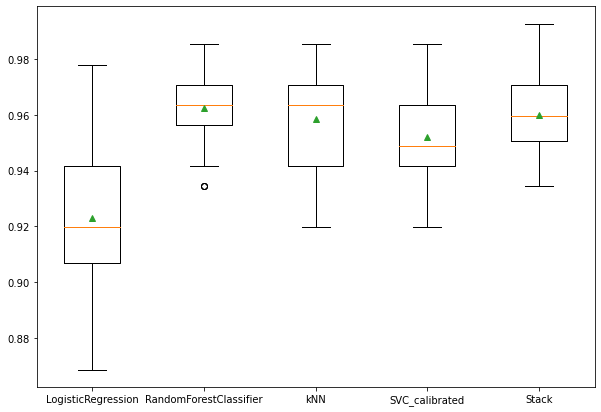

In [97]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_test, y_test)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.figure(figsize=(10,7))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [88]:
clf = models['Stack']

In [89]:
filename = r'C:\Users\ponde\Documents\FreshJobs\link_classifier.sav'
pickle.dump(clf, open(filename, 'wb'))

The RandomForestClassifier performed a little bit better, so let's evaluate its genaralization capacity vs the stack.

# Deep diving the results

In [98]:
dfFull = pd.read_csv(r'C:\Users\ponde\Documents\programacao\Python\FreshJobs\dataset_before_col_drop2020-11-20 14h53.csv')

In [101]:
pred_stack = clf.predict(df.drop('candidateMatch',axis=1))
pred_rfc = rfc_grid.best_estimator_.predict(df.drop('candidateMatch',axis=1))

In [103]:
dfFull['pred_stack'] = pred_stack
dfFull['pred_rfc'] = pred_rfc
dfFull['correct_stack'] = np.where(dfFull['pred_stack']==dfFull['candidateMatch'],1,0)
dfFull['correct_rfc'] = np.where(dfFull['pred_rfc']==dfFull['candidateMatch'],1,0)

In [104]:
matches = dfFull[['company','correct_stack','correct_rfc']].groupby('company').agg(['mean','count'])

In [105]:
matches

correct_stack       correct_rfc      
                        mean count        mean count
company                                             
Cisco               0.870968    93    0.860215    93
Ernest & young      1.000000    58    1.000000    58
Facebook            0.999257  2690    0.999257  2690
Manulife            0.988372    86    1.000000    86
Okta                0.935065   462    0.939394   462
Oracle              0.891720   157    0.878981   157
Snowflake           0.793651    63    0.777778    63
appnovation         1.000000    61    1.000000    61
clearbanc           0.823529    17    0.764706    17
ecobee              1.000000   103    0.980583   103
glu                 1.000000   191    1.000000   191
google              1.000000     1    1.000000     1
klick               1.000000   165    1.000000   165
koho                1.000000    55    1.000000    55
later               0.950495   101    0.990099   101
loblaw              0.946429    56    0.875000    56
loblawdigital       1.000000   121    1.000000   121
loopio              1.000000    91    1.000000    91
mavencare           0.818182    66    0.878788    66
northone            0.913043    46    0.978261    46
opentext            0.800000   155    0.774194   155
remine              1.000000    39    1.000000    39
rubikloud.ai        0.958763    97    0.958763    97
scotiabank          0.995833   960    0.995833   960
sensibill           1.000000    15    1.000000    15
shopify             1.000000   118    0.983051   118
square              0.996721   305    0.996721   305
walmart             1.000000    22    1.000000    22
wattpad             0.857143    42    0.880952    42
yelp                0.905405    74    0.905405    74